In [36]:
from IPython.display import Image
from IPython.core.display import HTML 
from scipy import optimize

ModuleNotFoundError: No module named 'scipy'

## Flyby orbit procedure

Given: The Heliocentric velocities obtained from the Lambert solution for entry and exit of the planet's sphere of influence (SOI). These are transformed into the excess hypberblic velocities on entry and exit of the planet.

$\overline{V}_{\infty} = \overline{V} - \overline{V}_p$

- $\overline{V}_{entry} \rightarrow \overline{V}_{\infty,i}$
- $\overline{V}_{exit} \rightarrow \overline{V}_{\infty,f}$


### Basic Parameters ($e_i$, $e_f$, $a_i$, $a_f$, $v_{p,i}$, $v_{p,f}$, $r_{p,dv}$, $r_p$)

- $e_i$: Eccentricity of entry hyperbole.
- $e_f$: Eccentricity of exity hyperbole.
- $a_i$: Semi-major axis of entry hyperbole.
- $a_f$: Semi-major axis of exit hyperbole.
- $v_{p,i}$: Velocity at periapsis of entry hyperbole.
- $v_{p,f}$: Velocity at periapsis of exit hyperbole.
- $r_{p,dv}$: $\Delta{V}$ magnitude at the periapsis (retrograde/prograde)
- $r_p$: Radius of periapsis.

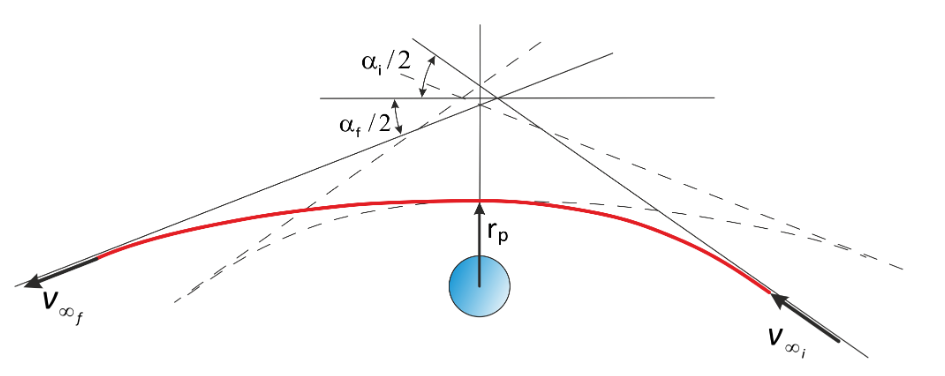

In [ ]:
Image("/home/samuel/Documents/flyby/pga.png", width=800, height=800)

**Step 1:** Calculate maximum bending angle achievable for $r_{p,min}$ ($\alpha_{max}$) [1]

$\alpha_{max} = \frac{\alpha_i}{2} + \frac{\alpha_f}{2}$

$\alpha_{max} = \arcsin{\frac{1}{\bigg(1+\frac{r_{p,min}V_{\infty,i}^2}{\mu_t}\bigg)}} + \arcsin{\frac{1}{\bigg(1+\frac{r_{p,min}V_{\infty,f}^2}{\mu_t}\bigg)}}$

In [16]:
def _alpha(r_p, v_inf_i, v_inf_f, mu):
    
    def den(r_p, v_inf, mu):
        return (1 + (r_p * np.linalg.norm(np.square(v_inf))) / (mu) )
    
    return np.arcsin(1/(den(r_p, v_inf_i, mu))) + np.arcsin(1/(den(r_p, v_inf_f, mu)))

**Step 2:** Calculate semi-major axis for entry and exit hypberbole ($a_{i}$ & $a_{f}$) [1]

$a_i = -\frac{\mu_t}{V_{\infty,i}^2}$;
$a_f = -\frac{\mu_t}{V_{\infty,f}^2}$

In [17]:
def _a(mu, v_inf):
    return - (mu)/(np.linalg.norm(np.square(v_inf)))


**Step 3:** Calculate eccentricity for entry and exit hypberbole ($e_{i}$ & $e_{f}$) [1]

$r_p=a_i(1-e_i)=a_f(1-e_f)$

In [18]:
def _e(r_p, a):
    return 1 - r_p/a

**Step 4:** Solve Newton-Rapson root-finding equation [1]

$e_{i,n+1} = e_{i,n} - \frac{f(e_{i,n})}{f'(e_{i,n})}$

where:

$f(e_{i,n}) = \arcsin{\frac{1}{e_{i,n}}} + \arcsin{\frac{1}{1-\frac{a_i}{a_f}(1-e_{i,n})}} - \alpha$

$f'(e_{i,n}) = $

In [31]:
import scipy.optimize

def _f_e_i(e_i_n, a_i, a_f, alpha_req):
    return np.arcsin(1 / e_i_n) + np.arcsin(1 / (1 - (a_i / a_f) * (1 - e_i_n))) - alpha_req

def _d_f_e_i(e_i_n, a_i, a_f):
    def const_form(a, b, c):
        return - a / (np.sqrt(1 - (b / np.square(c))) * np.square(c))
    t1 = const_form(1, 1, e_i_n)
    t2 = const_form(a_i * a_f, np.square(a_f), a_f + a_i * (e_i_n - 1))
    return t1 + t2

def _newton_rapson(f_e_i, d_f_e_i, a_i, a_f, a_req):
    e_i_0 = 1.1  # Initial guess for root-finder.
    def f_e_i(e_i):
        return _f_e_i(e_i, a_i, a_f, a_req)
    def d_f_e_i(e_i):
        return _d_f_e_i(e_i, a_i, a_f)
    return optimize(f_e_i, e_i_0, d_f_e_i)

ModuleNotFoundError: No module named 'scipy'

**Step 5:** Calculate the velocities at periapsis for entry and exit hyperbole [1]

$v_{p,i}^2 = v_{\infty,i}^2\bigg(\frac{e_i + 1}{e_i - 1}\bigg)$;    
$v_{p,f}^2 = v_{\infty,f}^2\bigg(\frac{e_f + 1}{e_f - 1}\bigg)$

In [24]:
def _v_p(v_inf, e):
    return np.sqrt(np.square(np.linalg.norm(v_inf)) * (e + 1) / (e - 1))

**Step 6:** Calculate the $\Delta{V}$ impulse required at periapsis [1]

$\Delta{V}_1 = |v_{p,f} - v_{p,i}|$

In [25]:
def _r_p_dv(v_p_i, v_p_f):
    return np.linalg.norm(v_p_i - v_p_f)

**Step 7:** Calculate the radius of periapsis $r_p$ [1]

$r_p=a_i(1-e_i)=a_f(1-e_f)$

In [32]:
def _r_p(a,e):
    return a*(1-e)

### Refined Parameters ($e_i$, $e_f$, $a_i$, $a_f$, $v_{p,i}$, $v_{p,f}$, $r_{p,dv}$, $r_p$)

**Step 1:** Calculate the J2000 normal vector of the orbital plane ($\hat{n}_h$)  

$\hat{n}_h = \frac{\overline{V}_{\infty, i}\times{\overline{V}_{\infty, f}}}{|\overline{V}_{\infty, i}\cdot{\overline{V}_{\infty, f}}|}$

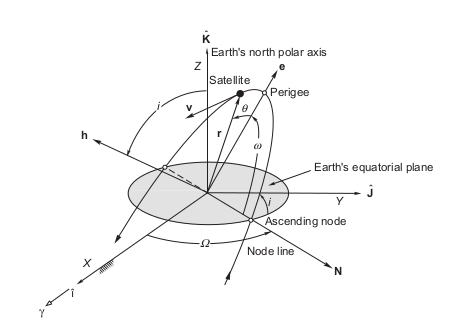

In [8]:
Image("/home/samuel/Documents/flyby/equatorial_frame_orbital_elements.png", width=500, height=500)